## STEP 1: LOAD DATA

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Load Sales Data

In [5]:
sales_df = pd.read_csv("new_sales_train_evaluation.csv")

In [7]:
sales_df

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,FOODS_3_806_CA_1_evaluation,FOODS_3_806,FOODS_3,FOODS,CA_1,CA,0,0,0,0,...,0,1,1,0,0,0,1,2,0,2
3028,FOODS_3_807_CA_1_evaluation,FOODS_3_807,FOODS_3,FOODS,CA_1,CA,7,8,3,6,...,2,5,0,2,1,1,2,3,6,5
3029,FOODS_3_808_CA_1_evaluation,FOODS_3_808,FOODS_3,FOODS,CA_1,CA,22,18,14,19,...,0,0,0,0,0,0,0,0,0,0
3030,FOODS_3_809_CA_1_evaluation,FOODS_3_809,FOODS_3,FOODS,CA_1,CA,0,0,0,0,...,2,3,3,0,4,2,1,1,2,1


### Load Sell Prices

In [9]:
price_df = pd.read_csv("new_sell_prices.csv")

In [11]:
price_df

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
3073,CA_1,HOBBIES_1_014,11138,0.98
3074,CA_1,HOBBIES_1_014,11139,0.98
3075,CA_1,HOBBIES_1_014,11140,0.98
3076,CA_1,HOBBIES_1_014,11141,0.98


### Load Calendar

In [13]:
calendar_df = pd.read_csv("calendar.csv")

In [15]:
calendar_df

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


## STEP 2 : EDA AND DATA PREPROCESSING

### Shape of Dataframes

In [19]:
print("Sales shape: ",sales_df.shape)

Sales shape:  (3032, 1947)


In [21]:
print("Sell Price shape: ",price_df.shape)

Sell Price shape:  (3078, 4)


In [23]:
print("Calendar shape: ",calendar_df.shape)

Calendar shape:  (1969, 14)


### Checking for Missing values

In [17]:
sales_df.isnull().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1937      0
d_1938      0
d_1939      0
d_1940      0
d_1941      0
Length: 1947, dtype: int64

In [19]:
price_df.isnull().sum()

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

In [21]:
calendar_df.isnull().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

### Handle Missing values

In [23]:
calendar_df["event_name_1"].fillna("No_Event",inplace=True)
calendar_df["event_type_1"].fillna("None",inplace=True)

In [25]:
calendar_df["event_name_2"].fillna("No_Event",inplace=True)
calendar_df["event_type_2"].fillna("None",inplace=True)

In [27]:
calendar_df.isnull().sum()

date            0
wm_yr_wk        0
weekday         0
wday            0
month           0
year            0
d               0
event_name_1    0
event_type_1    0
event_name_2    0
event_type_2    0
snap_CA         0
snap_TX         0
snap_WI         0
dtype: int64

### Check for Duplicates

In [29]:
print("Sales Data: ",sales_df.duplicated().sum(), "duplicates")

Sales Data:  0 duplicates


In [31]:
print("Calendar Data: ",calendar_df.duplicated().sum(), "duplicates")

Calendar Data:  0 duplicates


In [33]:
print("Sell Price Data: ",price_df.duplicated().sum(), "duplicates")

Sell Price Data:  0 duplicates


### Summary Statistics and Data Types

In [35]:
print("Summary stats for Sales Data")
display(sales_df.describe())

Summary stats for Sales Data


,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
count,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,...,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000
mean,1.425132,1.365765,0.923483,1.000660,0.863127,1.073219,1.132916,1.786609,1.425132,1.037269,...,1.617414,2.046834,2.192282,1.494063,1.289248,1.307058,1.348285,1.453826,1.884235,2.059037
std,5.369827,6.663109,3.623954,4.585419,3.811641,4.507179,5.370454,8.097006,6.729025,4.336581,...,3.580262,4.342760,4.744717,3.284784,3.088667,3.286553,3.022418,3.343895,4.161153,4.857061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,147.000000,198.000000,92.000000,134.000000,115.000000,90.000000,171.000000,204.000000,214.000000,94.000000,...,77.000000,66.000000,74.000000,55.000000,49.000000,77.000000,51.000000,69.000000,67.000000,114.000000


In [37]:
sales_df.describe(include="object")

,id,item_id,dept_id,cat_id,store_id,state_id
count,3032,3032,3032,3032,3032,3032
unique,3032,3032,7,3,1,1
top,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,FOODS_3,FOODS,CA_1,CA
freq,1,1,806,1420,3032,3032


In [39]:
print("Calendar Info: ")
calendar_df.info()

Calendar Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  1969 non-null   object
 8   event_type_1  1969 non-null   object
 9   event_name_2  1969 non-null   object
 10  event_type_2  1969 non-null   object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [41]:
print("Sell Price Info: ")
price_df.info()

Sell Price Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3078 entries, 0 to 3077
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   store_id    3078 non-null   object 
 1   item_id     3078 non-null   object 
 2   wm_yr_wk    3078 non-null   int64  
 3   sell_price  3078 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 96.3+ KB


### Outlier Detection

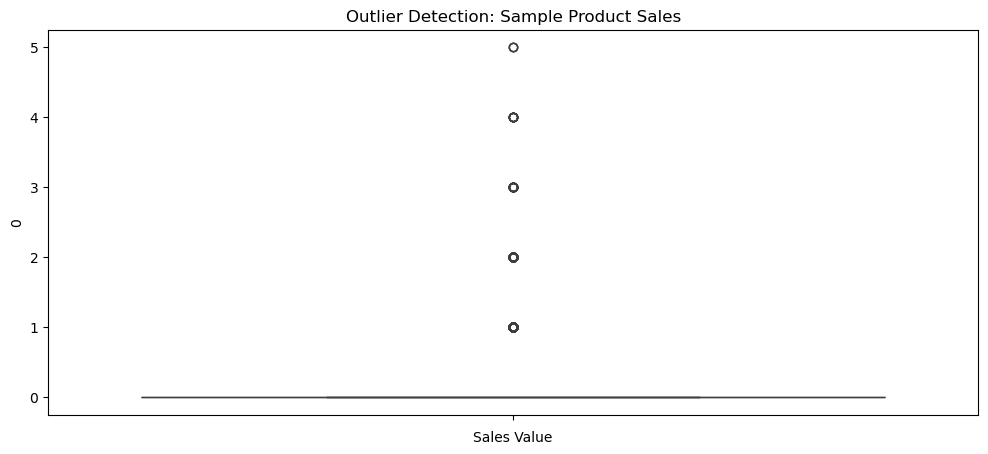

In [43]:
# Select sales values from a sample item
sample_sales = sales_df.iloc[0,6:]

plt.figure(figsize=(12,5))
sns.boxplot(data = sample_sales)
plt.title("Outlier Detection: Sample Product Sales")
plt.xlabel("Sales Value")
plt.show()

In [45]:
# View unique categorical values
print("Encoding Prep")
print("Store IDs:",sales_df["store_id"].unique())

Encoding Prep
Store IDs: ['CA_1']


In [47]:
print("State IDs:",sales_df["state_id"].unique())

State IDs: ['CA']


In [49]:
print("Category IDs:",sales_df["cat_id"].unique())

Category IDs: ['HOBBIES' 'HOUSEHOLD' 'FOODS']


In [51]:
print("Department IDs:",sales_df["dept_id"].unique())

Department IDs: ['HOBBIES_1' 'HOBBIES_2' 'HOUSEHOLD_1' 'HOUSEHOLD_2' 'FOODS_1' 'FOODS_2'
 'FOODS_3']


In [53]:
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

In [55]:
# Ensure 'd' is category for efficient merge
calendar_df['d'] = calendar_df['d'].astype('category')

In [57]:
calendar_df

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,No_Event,None,No_Event,None,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,No_Event,None,No_Event,None,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,No_Event,None,No_Event,None,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,No_Event,None,No_Event,None,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,No_Event,None,No_Event,None,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,No_Event,None,No_Event,None,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,No_Event,None,No_Event,None,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,No_Event,None,No_Event,None,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,No_Event,None,No_Event,None,0,0,0


### Reshape Sales Data (Wide -> Long Format)

In [59]:
# Melt the sales_df into long format
id_vars = ['id','item_id','dept_id','cat_id','store_id','state_id']
value_vars = [col for col in sales_df.columns if col.startswith('d_')]

sales_long = pd.melt(sales_df,id_vars = id_vars,value_vars = value_vars, var_name = 'd', value_name = 'sales')

In [61]:
print("Long format sales preview:")
sales_long.head()

Long format sales preview:


,id,item_id,dept_id,cat_id,store_id,state_id,d,sales
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [63]:
# Merge with calendar to get actual date
sales_merged = sales_long.merge(calendar_df,how='left',on='d')

In [65]:
# Merge with sell prices to get price info
sales_merged = sales_merged.merge(price_df,how='left', on = ['store_id','item_id','wm_yr_wk'])

In [66]:
sales_merged.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,No_Event,None,No_Event,None,0,0,0,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,No_Event,None,No_Event,None,0,0,0,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,No_Event,None,No_Event,None,0,0,0,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,No_Event,None,No_Event,None,0,0,0,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,No_Event,None,No_Event,None,0,0,0,NaN


### Visualize sales Trends

In [69]:
# Visualize total daily sales trend over time
daily_sales = sales_merged.groupby('date')['sales'].sum().reset_index()

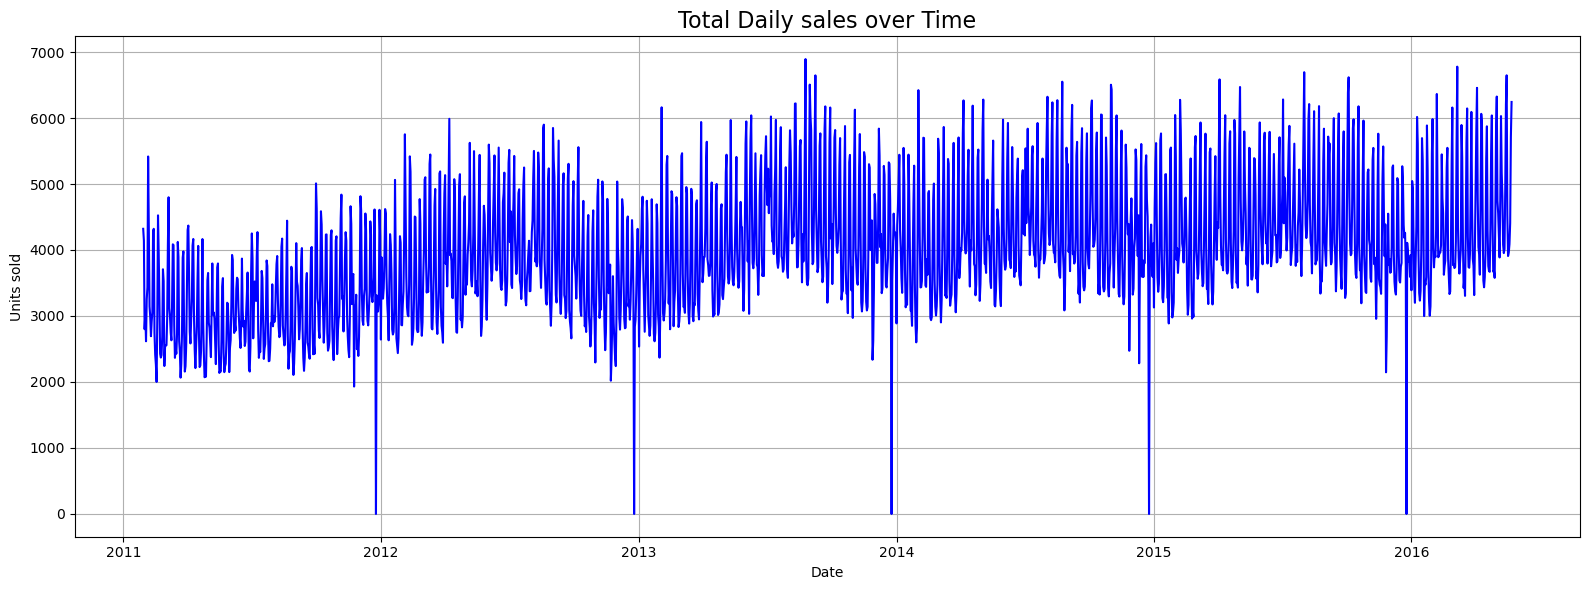

In [71]:
# plot the trend
plt.figure(figsize=(16,6))
sns.lineplot(data = daily_sales, x='date', y='sales', color='blue')
plt.title('Total Daily sales over Time',fontsize=16)
plt.xlabel('Date')
plt.ylabel('Units sold')
plt.grid(True)
plt.tight_layout()
plt.show()

### Sales Aggregation and Category-level insights

#### Sales by store

In [73]:
# Total sales by store
store_sales = sales_merged.groupby('store_id')['sales'].sum().sort_values(ascending=False)

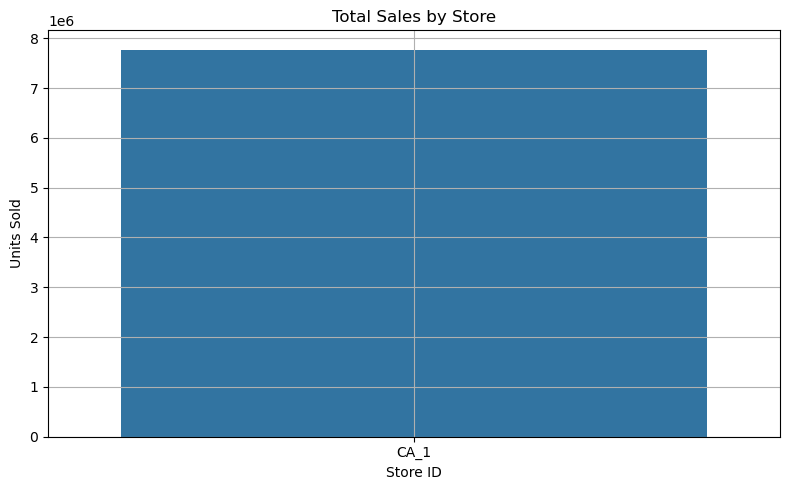

In [75]:
# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=store_sales.index, y=store_sales.values)
plt.title('Total Sales by Store')
plt.xlabel('Store ID')
plt.ylabel('Units Sold')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Sales by Category

In [77]:
# Total sales by category
cat_sales = sales_merged.groupby('cat_id')['sales'].sum().sort_values(ascending=False)

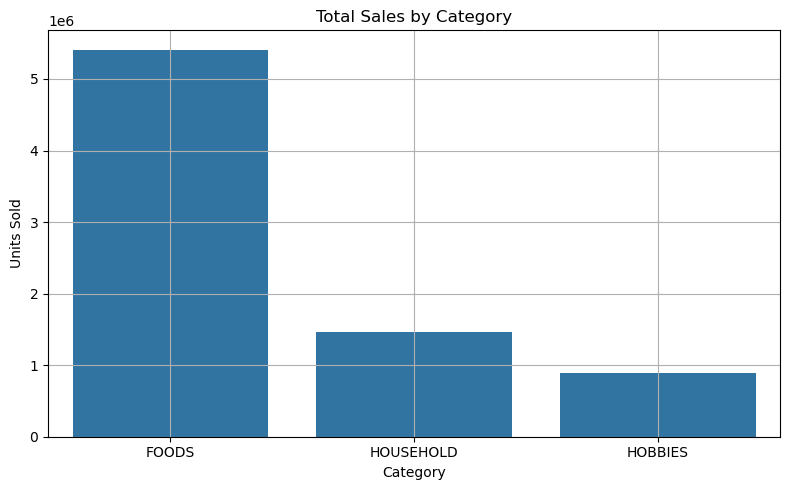

In [79]:
# Plot
plt.figure(figsize=(8,5))
sns.barplot(x = cat_sales.index, y = cat_sales.values)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Sales by Weekday

In [81]:
sales_merged['date'] = pd.to_datetime(sales_merged['date'])

# drop row with missing date or sales
weekday_sales = sales_merged.dropna(subset=['date','sales'])

# create a new column for weekday name (Monday, tuesday...)
weekday_sales['weekday']=weekday_sales['date'].dt.day_name()

In [83]:
# sales by weekday
weekday_avg = weekday_sales.groupby('weekday')['sales'].mean().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index()

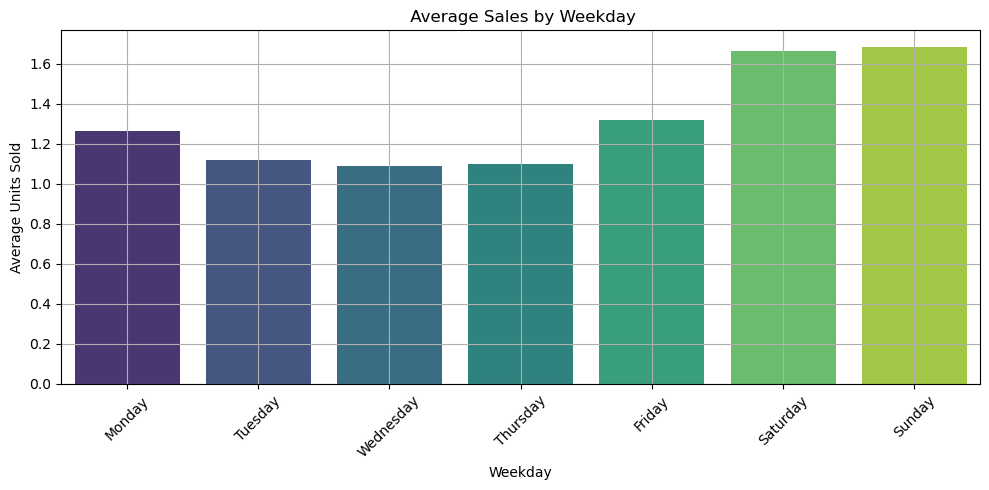

In [85]:
# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=weekday_avg, x='weekday',y='sales',palette='viridis')
plt.title(' Average Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Units Sold')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## STEP 3: FEATURE ENGINEERING FOR TIME SERIES MODELS

#### Create Time Features

In [87]:
sales_merged['year'] = sales_merged['date'].dt.year
sales_merged['month'] = sales_merged['date'].dt.month
sales_merged['day'] = sales_merged['date'].dt.day
sales_merged['dayofweek'] = sales_merged['date'].dt.dayofweek
sales_merged['weekofyear'] = sales_merged['date'].dt.isocalendar().week
sales_merged['is_weekend'] = sales_merged['dayofweek'].isin([5,6]).astype(int)

#### Create Lag and Rolling Features

In [89]:
# Choose a sample item to demonstrate
sample_item = sales_merged[(sales_merged['store_id'] == 'CA_1') & (sales_merged['item_id'] == 'FOODS_1_001')].copy()

In [91]:
# sort by date
sample_item.sort_values('date',inplace=True)

In [93]:
# create lag features
sample_item['lag_1'] = sample_item['sales'].shift(1)
sample_item['lag_7'] = sample_item['sales'].shift(7)
sample_item['lag_14'] = sample_item['sales'].shift(14)

In [95]:
# Rolling mean Features
sample_item['rolling_mean_7'] = sample_item['sales'].shift(1).rolling(window=7).mean()
sample_item['rolling_mean_30'] = sample_item['sales'].shift(1).rolling(window=30).mean()

In [97]:
# show some rows
sample_item[['date','sales','lag_1','lag_7','rolling_mean_7','rolling_mean_30']].tail(10)

,date,sales,lag_1,lag_7,rolling_mean_7,rolling_mean_30
5856404,2016-05-13,2,0.0,3.0,0.714286,0.933333
5859436,2016-05-14,3,2.0,0.0,0.571429,0.966667
5862468,2016-05-15,1,3.0,0.0,1.000000,1.033333
5865500,2016-05-16,0,1.0,0.0,1.142857,1.066667
5868532,2016-05-17,0,0.0,2.0,1.142857,1.000000
5871564,2016-05-18,0,0.0,0.0,0.857143,1.000000
5874596,2016-05-19,1,0.0,0.0,0.857143,0.866667
5877628,2016-05-20,0,1.0,2.0,1.000000,0.866667
5880660,2016-05-21,0,0.0,3.0,0.714286,0.833333
5883692,2016-05-22,0,0.0,1.0,0.285714,0.833333


## STEP 4 : TIME SERIES FORECASTING MODELS

### 4.1 ARIMA: AutoRegressive Integrated Moving Average

In [99]:
# Import libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [101]:
# set index and check stationarity
ts = sample_item.set_index('date')['sales']

# Fill NA for modelling
ts = ts.fillna(0)

# Check stationarity using Augmented Dickey-Fuller test
adf_result = adfuller(ts)
print("ADF Statistics:",adf_result[0])
print("p-value:",adf_result[1])

ADF Statistics: -5.64851371134491
p-value: 9.98446665364834e-07


In [242]:
# Difference the data to make it stationary
ts_diff = ts.diff().dropna() # first order differencing

#### Fit SARIMA Model

C:\Users\harin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\harin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


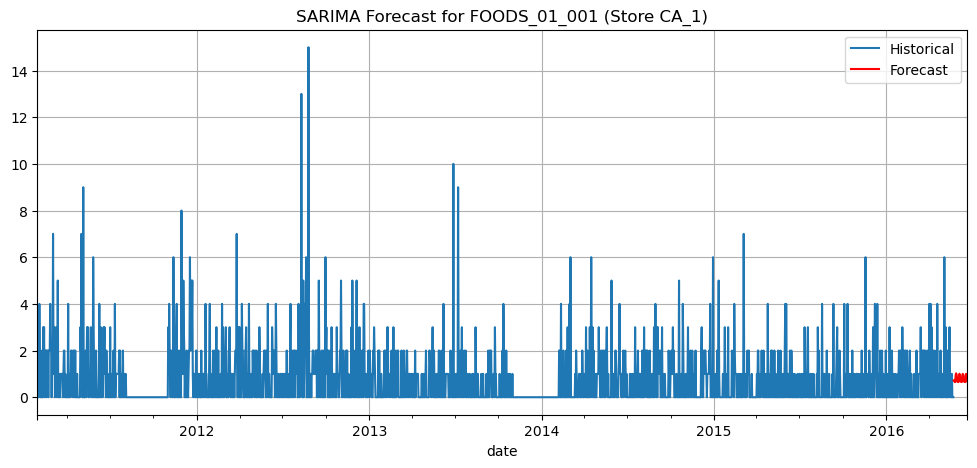

In [103]:
# Fit SARIMA Model
model = SARIMAX(ts, order=(1,1,1),seasonal_order=(1,1,1,7))
results = model.fit(disp=False)

# Forecast next 30 days
forecast = results.get_forecast(steps=30)
forecast_df = forecast.summary_frame()

# Plot
plt.figure(figsize=(12,5))
ts.plot(label='Historical')
forecast_df['mean'].plot(label='Forecast',color='red')
plt.title('SARIMA Forecast for FOODS_01_001 (Store CA_1)')
plt.legend()
plt.grid(True)
plt.show()

#### Train-Test Split

In [276]:
# splitting the data into training and testing
train_size = int(len(ts)*0.8)
Atrain, Atest = ts[:train_size],ts[train_size:]

#### Evaluate the Model

In [278]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# ARIMA forecast for the test data
arima_forecast = results.forecast(steps=len(Atest))

# Evaluate the model performance
arima_mse = mean_squared_error(Atest,arima_forecast)
arima_mae = mean_absolute_error(Atest,arima_forecast)
arima_rmse = np.sqrt(arima_mse)
arima_r2 = r2_score(Atest,arima_forecast)

# print evaluation metrics
print(f"ARIMA MSE: {arima_mse:.2f}")
print(f"ARIMA MAE: {arima_mae:.2f}")
print(f"ARIMA RMSE: {arima_rmse:.2f}")
print(f"ARIMA R2 SCORE: {arima_r2:.2f}")

ARIMA MSE: 1.13
ARIMA MAE: 0.83
ARIMA RMSE: 1.06
ARIMA R2 SCORE: -0.04


#### Plot the Results(Actual Vs Predicted)

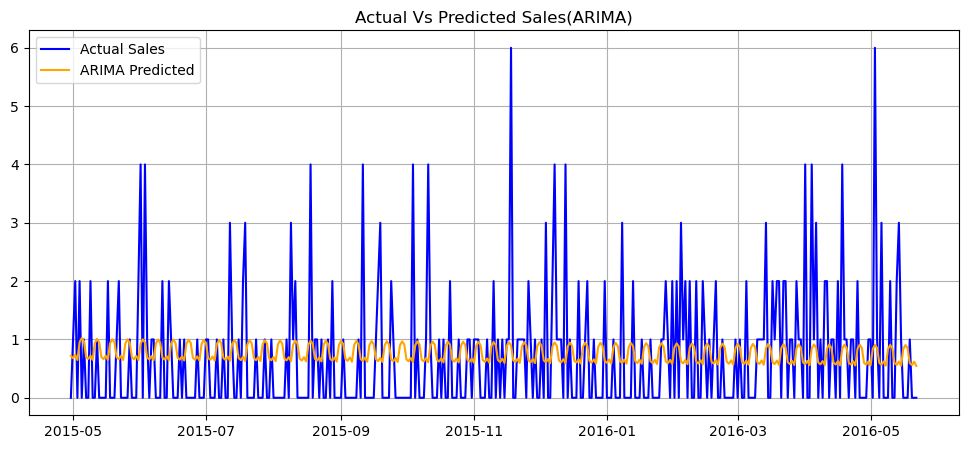

In [252]:
plt.figure(figsize=(12,5))
plt.plot(test.index, test, label='Actual Sales',color='Blue')
plt.plot(test.index, arima_forecast,label='ARIMA Predicted',color='orange')
plt.legend()
plt.title('Actual Vs Predicted Sales(ARIMA)')
plt.grid(True)
plt.show()

### 4.2 : Forecasting with Prophet

In [105]:
# Find top-selling item-store combinations
top_sellers = sales_merged.groupby(['store_id','item_id'])['sales'].sum().reset_index()
top_sellers = top_sellers[top_sellers['sales']>0].sort_values(by='sales',ascending=False)

# Display top 5 combinations
top_sellers.head()

,store_id,item_id,sales
702,CA_1,FOODS_3_090,128855
1198,CA_1,FOODS_3_586,88846
864,CA_1,FOODS_3_252,76055
732,CA_1,FOODS_3_120,63107
1325,CA_1,FOODS_3_714,54617


In [107]:
# Select a product and store with good sales data
sample_item = sales_merged[(sales_merged['store_id']=='CA_1') & (sales_merged['item_id']=='FOODS_3_090')].copy()

# check if there are non-zero sales
print("sales summary: ",sample_item['sales'].describe())

sales summary:  count    1941.000000
mean       66.385884
std        57.500157
min         0.000000
25%        25.000000
50%        62.000000
75%        97.000000
max       599.000000
Name: sales, dtype: float64


#### Prepare Data for Prophet

In [109]:
# Group by date and sum sales (Prophet needs daily data)
prophet_data = sample_item.groupby('date')['sales'].sum().reset_index()

# Rename columns for Prophet
prophet_data.rename(columns={'date':'ds','sales':'y'}, inplace=True)

# check for NaNs
print(prophet_data.isna().sum())
prophet_data.head()

ds    0
y     0
dtype: int64


,ds,y
0,2011-01-29,107
1,2011-01-30,182
2,2011-01-31,47
3,2011-02-01,47
4,2011-02-02,62


#### Split into Train and Test

In [280]:
# sort data by date (important for time series)
prohet_data = prophet_data.sort_values('ds')

# Define cutoff for training (70% for training and 20% for testing)
Ptrain = prophet_data[:-30]
Ptest = prophet_data[-30:]

#### Initialize and Train Prophet on Trained Data

In [282]:
from prophet import Prophet

# Initialize Prophet model with basic seasonality
model = Prophet(daily_seasonality=True, yearly_seasonality=True)

# Fit the model
model.fit(Ptrain)

15:11:45 - cmdstanpy - INFO - Chain [1] start processing
15:11:46 - cmdstanpy - INFO - Chain [1] done processing


#### Forecast on Test Period

In [284]:
# Forecast for next 30 days
future = model.make_future_dataframe(periods=30)

# Predict future values
forecast = model.predict(future)

# keeping only the forecasted value that will match to test period
forecast_test = forecast.tail(30)

#### Evaluate the Model

In [286]:
# True vs predicted
y_true_P = Ptest['y'].values
y_pred_P = forecast_test['yhat'].values

# Evaluation metrics
prophet_mse = mean_squared_error(y_true_P,y_pred_P)
prophet_mae = mean_absolute_error(y_true_P,y_pred_P)
prophet_rmse = np.sqrt(prophet_mse)
prophet_r2 = r2_score(y_true_P,y_pred_P)

print(f"Prophet MSE: {prophet_mse:.2f}")
print(f"Prophet MAE: {prophet_mae:.2f}")
print(f"Prophet RMSE: {prophet_rmse:.2f}")
print(f"Prophet R2 SCORE: {prophet_r2:.2f}")

Prophet MSE: 1081.73
Prophet MAE: 29.43
Prophet RMSE: 32.89
Prophet R2 SCORE: -1.55


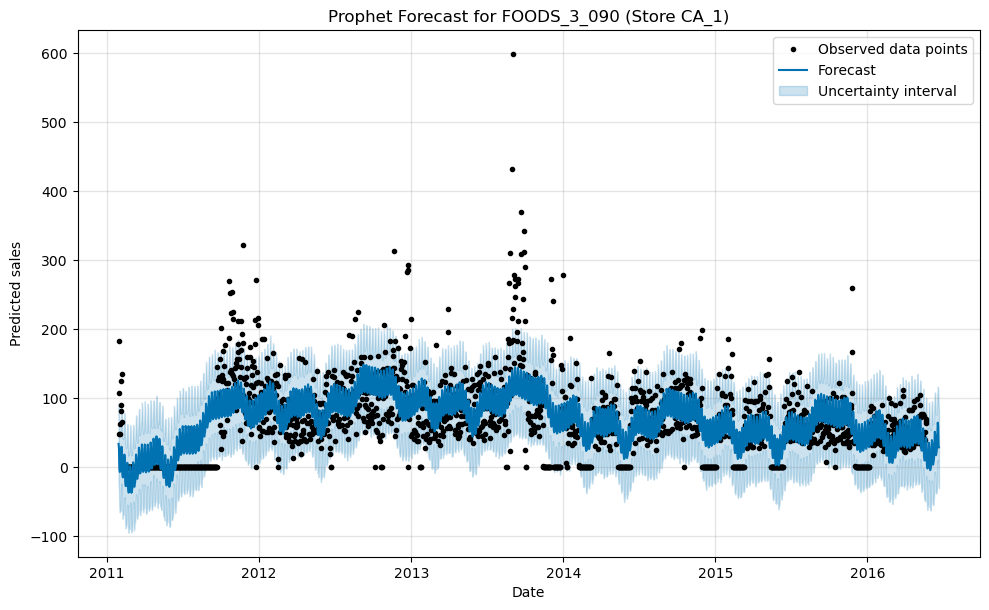

In [115]:
# Plot Forecast

fig = model.plot(forecast)
plt.title("Prophet Forecast for FOODS_3_090 (Store CA_1)")
plt.xlabel("Date")
plt.ylabel("Predicted sales")
plt.legend()
plt.grid(True)
plt.show()

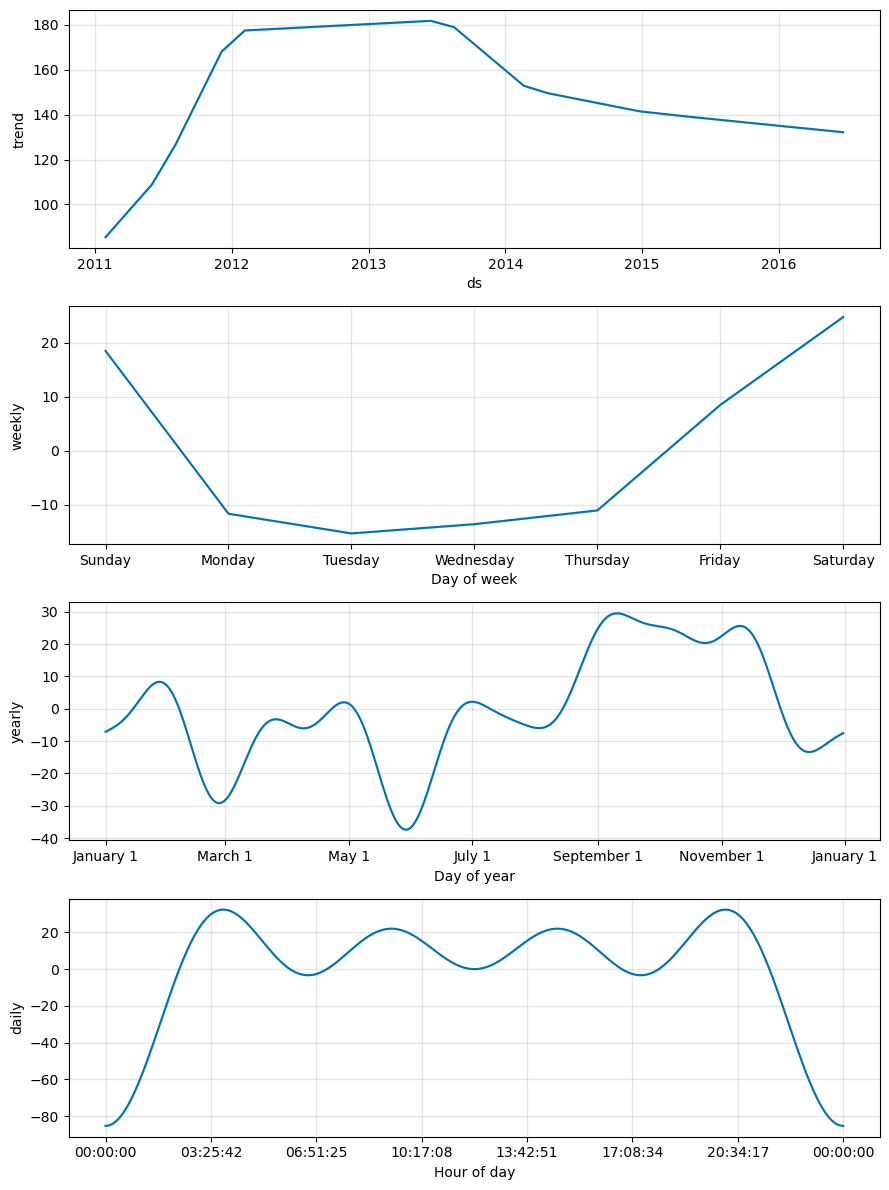

In [117]:
# Plot Trend & Seasonality Components

# Decompose trend, daily/weekly/yearly seasonality
model.plot_components(forecast)
plt.tight_layout()
plt.show()

### 4.3 : XGBoost Model for Sales Forecasting

#### Frome Time series to Tabular Format

In [120]:
!pip install xgboost

In [122]:
daily_sales

,date,sales
0,2011-01-29,4321
1,2011-01-30,4141
2,2011-01-31,2800
3,2011-02-01,3034
4,2011-02-02,2617
...,...,...
1936,2016-05-18,3963
1937,2016-05-19,4088
1938,2016-05-20,4408
1939,2016-05-21,5713


In [288]:
daily_sales.to_csv('daily_sales.csv',index=False)

In [290]:
# Load the dataset
df = pd.read_csv('daily_sales.csv')


In [292]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

In [294]:
# Create lag features
df['lag_1'] = df['sales'].shift(1)
df['lag_2'] = df['sales'].shift(2)
df['lag_7'] = df['sales'].shift(7)

In [296]:
# Drop Missing rows from lags
df.dropna(inplace=True)

In [298]:
# define features and target
X = df[['lag_1','lag_2','lag_7']]
y = df['sales']

In [300]:
df.head()

,sales,lag_1,lag_2,lag_7
date,,,,
2011-02-05,5417,3435.0,3254.0,4321.0
2011-02-06,4321,5417.0,3435.0,4141.0
2011-02-07,3145,4321.0,5417.0,2800.0
2011-02-08,2984,3145.0,4321.0,3034.0
2011-02-09,2694,2984.0,3145.0,2617.0


#### Train / Test Split

In [302]:
from sklearn.model_selection import train_test_split

In [304]:
# 80% for train, 20% for test
XX_train, XX_test, Xy_train, Xy_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [306]:
XX_train.shape

(1547, 3)

In [308]:
XX_test.shape

(387, 3)

In [310]:
Xy_train.shape

(1547,)

In [312]:
Xy_test.shape

(387,)

In [158]:
split = int(len(df)*0.8)
X_trainn, X_testt = X.iloc[:split],X.iloc[split:]
y_trainn, y_testt = y.iloc[:split], y.iloc[split:]

In [160]:
X_trainn.shape

(1547, 3)

In [162]:
X_testt.shape

(387, 3)

In [164]:
y_trainn.shape

(1547,)

In [166]:
y_testt.shape

(387,)

#### Train the XGBoost Model

In [314]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1,max_depth=5)
model.fit(XX_train,Xy_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

#### Make predictions

In [316]:
Xy_pred = model.predict(XX_test)

#### evaluate the Model

In [175]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [320]:
xg_mse = mean_squared_error(Xy_test,Xy_pred)
xg_mae = mean_absolute_error(Xy_test,Xy_pred)
xg_rmse = np.sqrt(xg_mse)
xg_r2 = r2_score(Xy_test,Xy_pred)

print(f"XGBoost MSE: {xg_mse:.2f}")
print(f"XGBoost MAE: {xg_mae:.2f}")
print(f"XGBoost RMSE: {xg_rmse:.2f}")
print(f"XGBoost R2 SCORE: {xg_r2:.2f}")

XGBoost MSE: 16634906.54
XGBoost MAE: 3961.57
XGBoost RMSE: 4078.59
XGBoost R2 SCORE: -16.40


#### Plot Actual vs Predicted

In [186]:
y_test = y_test.reset_index(drop=True)
y_pred = pd.Series(y_pred,index=y_test.index)

In [188]:
test_dates = df.index[-len(y_test):]

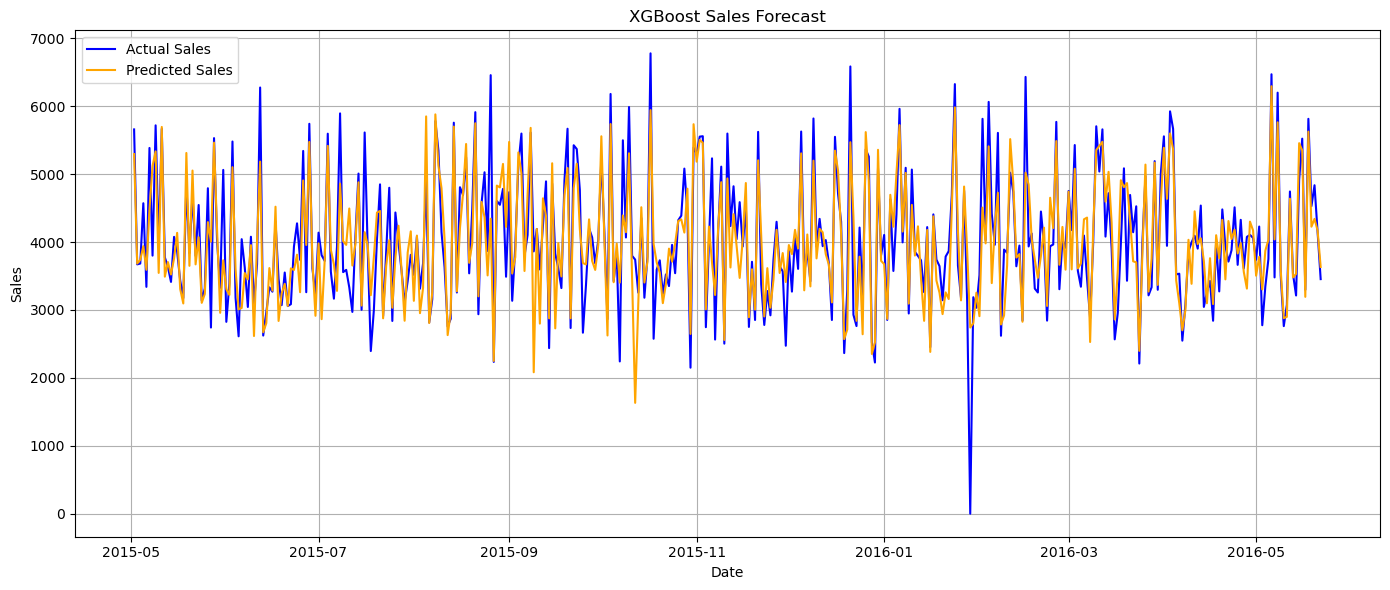

In [190]:
plt.figure(figsize=(14,6))
plt.plot(test_dates,y_test,label="Actual Sales", color='blue')
plt.plot(test_dates,y_pred,label="Predicted Sales",color='Orange')
plt.title("XGBoost Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [198]:
df

,sales,lag_1,lag_2,lag_7
date,,,,
2011-02-05,5417,3435.0,3254.0,4321.0
2011-02-06,4321,5417.0,3435.0,4141.0
2011-02-07,3145,4321.0,5417.0,2800.0
2011-02-08,2984,3145.0,4321.0,3034.0
2011-02-09,2694,2984.0,3145.0,2617.0
...,...,...,...,...
2016-05-18,3963,3909.0,4530.0,3953.0
2016-05-19,4088,3963.0,3909.0,4014.0
2016-05-20,4408,4088.0,3963.0,4904.0


#### Preprocess Data for LSTM

In [206]:
from sklearn.preprocessing import MinMaxScaler

df = df[['sales']]

In [208]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [322]:
def create_sequences(data,window_size=30):
    Xx,yy = [],[]
    for i in range(len(data)-window_size):
        Xx.append(data[i:i + window_size])
        yy.append(data[i + window_size])
    return np.array(Xx), np.array(yy)
Xx,yy = create_sequences(scaled_data,window_size=30)

print("Shape of X: ",Xx.shape)
print("Shape of y: ",yy.shape)

Shape of X:  (1904, 30, 1)
Shape of y:  (1904, 1)


#### Split Data into Train and Test

In [324]:
LX_train,LX_test,Ly_train,Ly_test = train_test_split(Xx,yy,test_size=0.2,random_state=42)

In [330]:
LX_train.shape,LX_test.shape,Ly_train.shape,Ly_test.shape

((1523, 30, 1), (381, 30, 1), (1523, 1), (381, 1))

#### Build the LSTM Model

In [221]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [332]:
model = Sequential([LSTM(50,activation='relu',input_shape=(LX_train.shape[1],1)),Dense(1)])
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

#### Train the Model

In [334]:
history = model.fit(LX_train,Ly_train,epochs=20,validation_data=(LX_test,Ly_test))

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1349 - val_loss: 0.0168
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0166 - val_loss: 0.0165
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0160 - val_loss: 0.0167
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0162 - val_loss: 0.0172
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0167 - val_loss: 0.0162
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0168 - val_loss: 0.0164
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0160 - val_loss: 0.0160
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0154 - val_loss: 0.0166
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0156 - val_loss: 0.0149
Epoch 10/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0155 - val_loss: 0.0128
Epoch 11/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0132 - val_loss: 0.0097
Epoch 12/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0

#### Evaluate the Model

In [336]:
Ly_pred = model.predict(LX_test)
y_pred_inv = scaler.inverse_transform(Ly_pred)
y_test_inv = scaler.inverse_transform(Ly_test)

# Metrics
lstm_mse = mean_squared_error(y_test_inv,y_pred_inv)
lstm_mae = mean_absolute_error(y_test_inv,y_pred_inv)
lstm_rmse = np.sqrt(lstm_mse)
lstm_r2 = r2_score(y_test_inv,y_pred_inv)

print(f"LSTM MSE: {lstm_mse:.2f}")
print(f"LSTM MAE: {lstm_mae:.2f}")
print(f"LSTM RMSE: {lstm_rmse:.2f}")
print(f"LSTM R2 SCORE: {lstm_r2:.2f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
LSTM MSE: 251581.91
LSTM MAE: 385.06
LSTM RMSE: 501.58
LSTM R2 SCORE: 0.76


#### Plot Actual vs Predicted

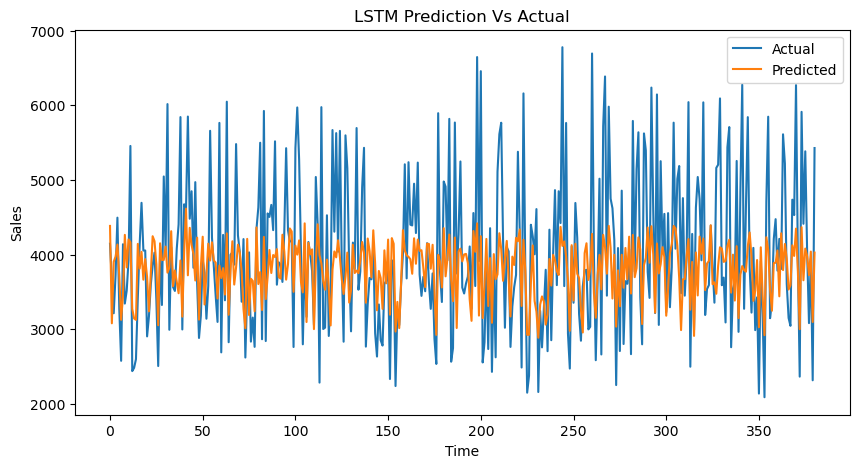

In [238]:
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title("LSTM Prediction Vs Actual")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()

## FINAL RESULTS COMPARISON

In [338]:
results = pd.DataFrame({'Model':['ARIMA','Prophet','XGBoost','LSTM'],
                        'MSE':[arima_mse,prophet_mse,xg_mse,lstm_mse],
                        'MAE': [arima_mae,prophet_mae,xg_mae,lstm_mae],
                        'RMSE':[arima_rmse,prophet_rmse,xg_rmse,lstm_rmse],
                        'r2_Score': [arima_r2,prophet_r2,xg_r2,lstm_r2]})
print(results)

     Model           MSE          MAE         RMSE   r2_Score
0    ARIMA  1.133363e+00     0.829491     1.064595  -0.036477
1  Prophet  1.081727e+03    29.427743    32.889625  -1.552254
2  XGBoost  1.663491e+07  3961.570943  4078.591245 -16.395142
3     LSTM  2.515819e+05   385.057531   501.579417   0.762147
